<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg" style="width: 700px;"/>

# Importing libraries 🐍

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dataset 📁

In [2]:
df = pd.read_csv("data.csv")

In [3]:
# Random 10 samples of data
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
460,3087000,8100,2,1,1,yes,no,no,no,no,1,no,unfurnished
411,3430000,2145,3,1,3,yes,no,no,no,no,0,yes,furnished
381,3605000,4000,2,1,1,yes,no,no,no,no,0,yes,semi-furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
405,3465000,3060,3,1,1,yes,no,no,no,no,0,no,unfurnished
97,6300000,6400,3,1,1,yes,yes,yes,no,yes,1,yes,semi-furnished
116,6020000,6900,3,2,1,yes,yes,yes,no,no,0,yes,unfurnished
438,3255000,4500,2,1,1,no,no,no,no,no,0,no,semi-furnished
211,4900000,12900,3,1,1,yes,no,no,no,no,2,no,furnished
183,5145000,7980,3,1,1,yes,no,no,no,no,1,yes,semi-furnished


In [4]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.shape # data shape

(545, 13)

In [6]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.duplicated().sum() # duplicate values check

0

In [9]:
data=df.copy()

# Data Visualization 📊📈📉

# Bar Plot 📊

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

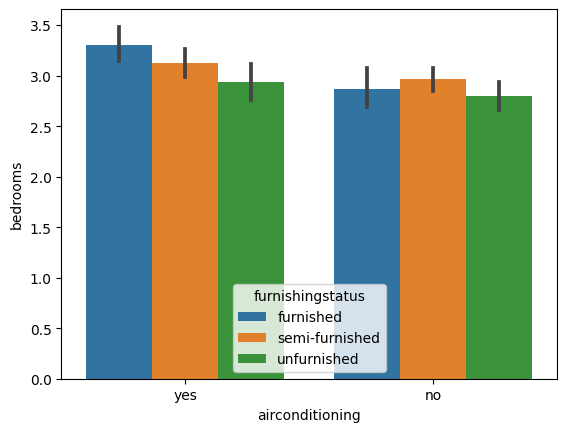

In [10]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

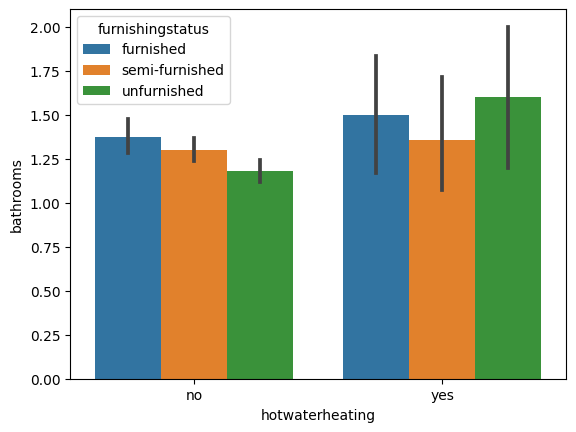

In [11]:
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms'],hue=df["furnishingstatus"])

# Box Plot 📊


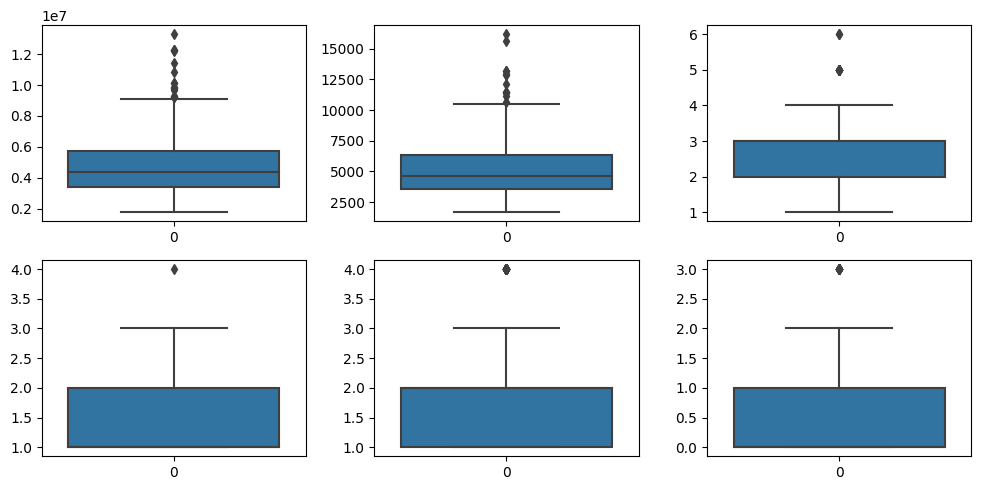

In [12]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x12b273490>,
 'caps': [<matplotlib.lines.Line2D at 0x12b27c950>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b272a50>],
 'medians': [<matplotlib.lines.Line2D at 0x12b27d9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12af2e1d0>],
 'means': []}

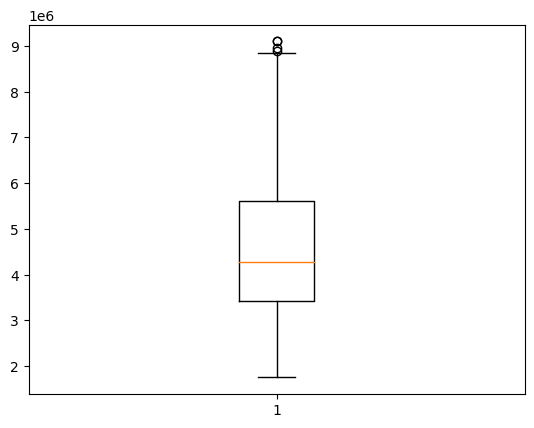

In [13]:
# Dealing with outliers in price 
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]
plt.boxplot(df.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x12b2e1d50>,
 'caps': [<matplotlib.lines.Line2D at 0x12b2e2e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x12af08190>],
 'medians': [<matplotlib.lines.Line2D at 0x12b2ec090>],
 'fliers': [<matplotlib.lines.Line2D at 0x12b24d990>],
 'means': []}

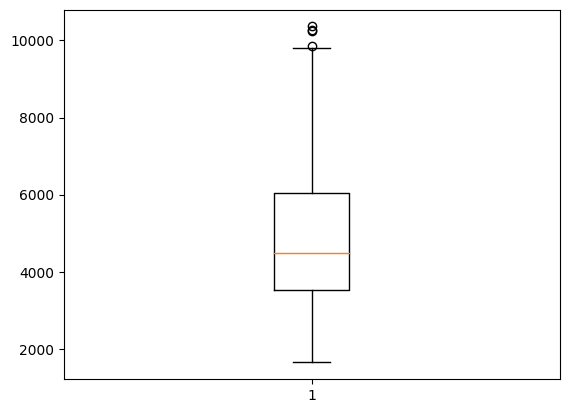

In [14]:
# Dealing with outliers in srea 
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)

<Axes: xlabel='furnishingstatus', ylabel='price'>

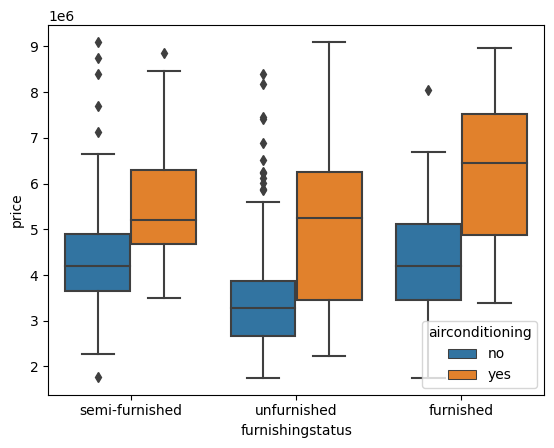

In [15]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

# Distplot 📊


/var/folders/lj/8s5qp0cj4mnfrfh3nbj958l00000gp/T/ipykernel_12402/2155128252.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bathrooms"],hist=False)
/var/folders/lj/8s5qp0cj4mnfrfh3nbj958l00000gp/T/ipykernel_12402/2155128252.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

<Axes: xlabel='bedrooms', ylabel='Density'>

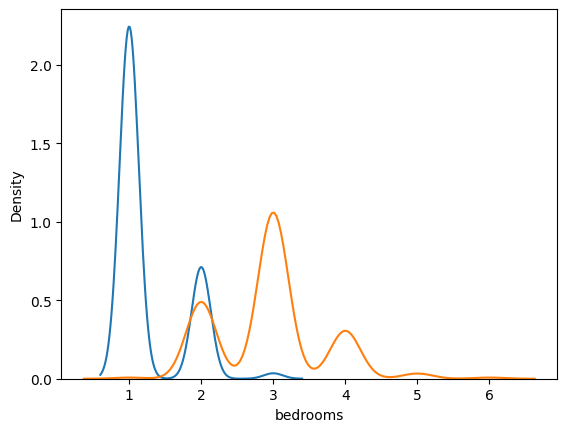

In [16]:
sns.distplot(df["bathrooms"],hist=False)
sns.distplot(df["bedrooms"],hist=False)

/var/folders/lj/8s5qp0cj4mnfrfh3nbj958l00000gp/T/ipykernel_12402/1823929439.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["stories"],hist=False)
/var/folders/lj/8s5qp0cj4mnfrfh3nbj958l00000gp/T/ipykernel_12402/1823929439.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

<Axes: xlabel='parking', ylabel='Density'>

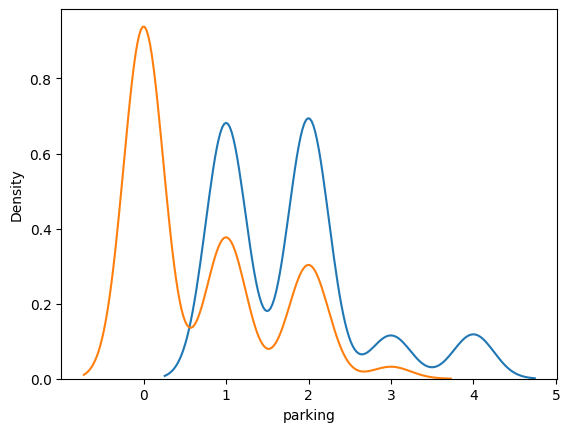

In [17]:
sns.distplot(df["stories"],hist=False)
sns.distplot(df["parking"],hist=False)

# Scatter Plot 📊📈


<Axes: xlabel='area', ylabel='price'>

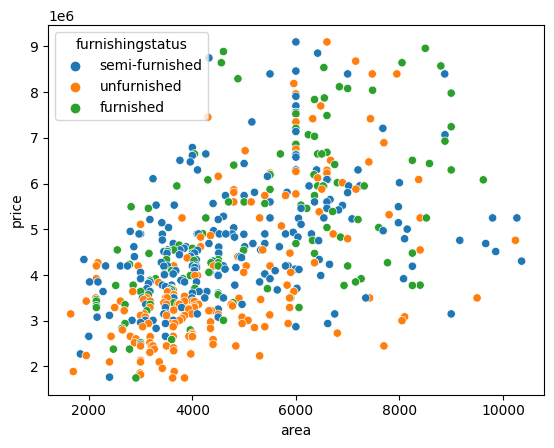

In [18]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

# Pair Plot 📊📈


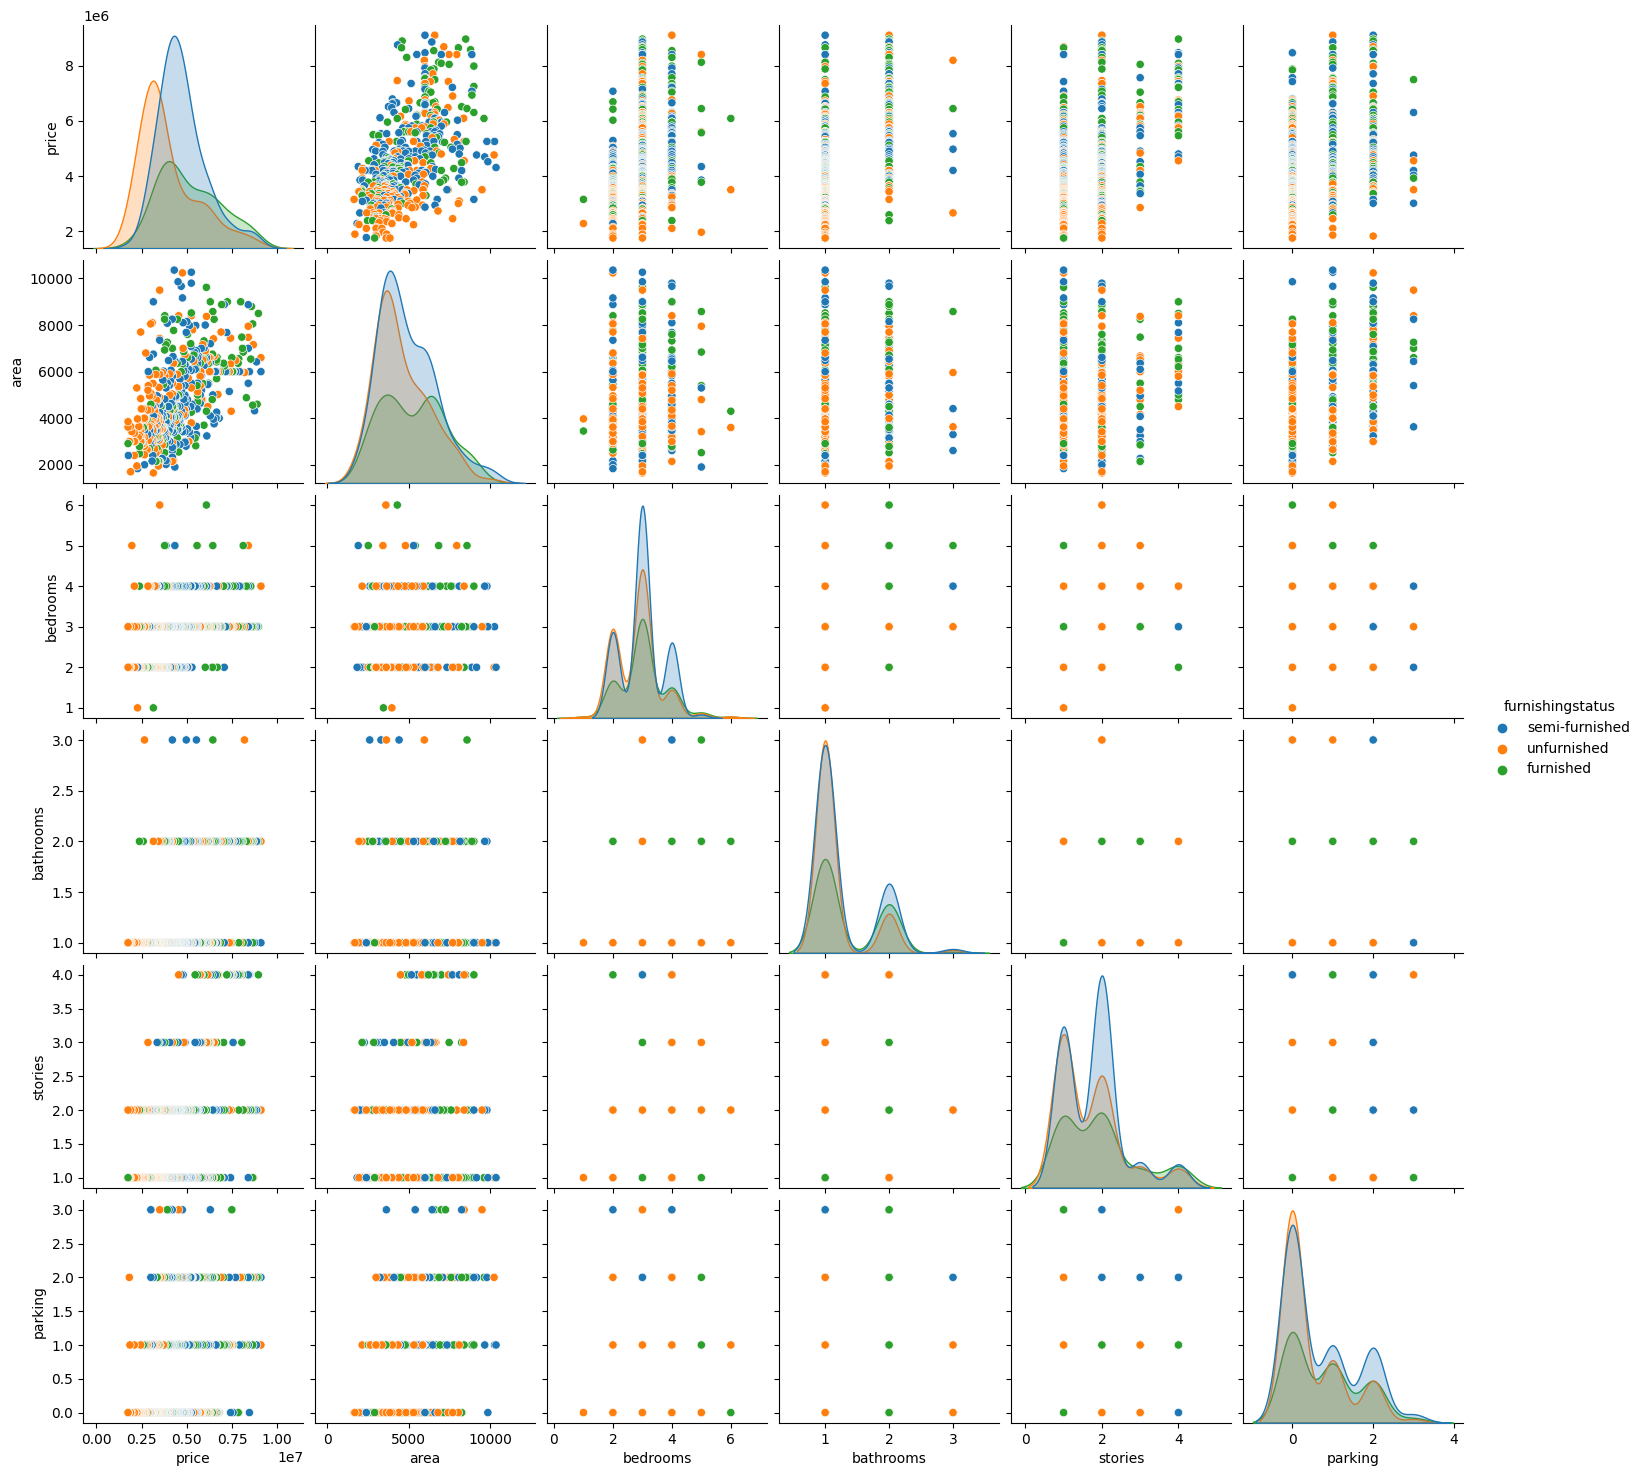

In [19]:
sns.pairplot(df,hue="furnishingstatus")

# Feature Engineering 🛠️


In [20]:
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,False,False,True,False,False,False,True,True
1,12250000,8960,4,4,4,3,False,False,True,False,False,False,True,False
2,12250000,9960,3,2,2,2,True,False,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,False,False,True,False,True,False,True,True
4,11410000,7420,4,1,2,2,False,False,True,True,True,False,True,False


In [21]:
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Feature Scaling ⚖️


In [22]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Training 📈


In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Models Evaluation 🧪

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print (f"Mean Square Erroe : {mse}")
print(f"R2 Score : {r2}")
plt.figure(figsize=(15, 6))


Mean Square Erroe : 1523019469501.2908
R2 Score : 0.6463350878895878


<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

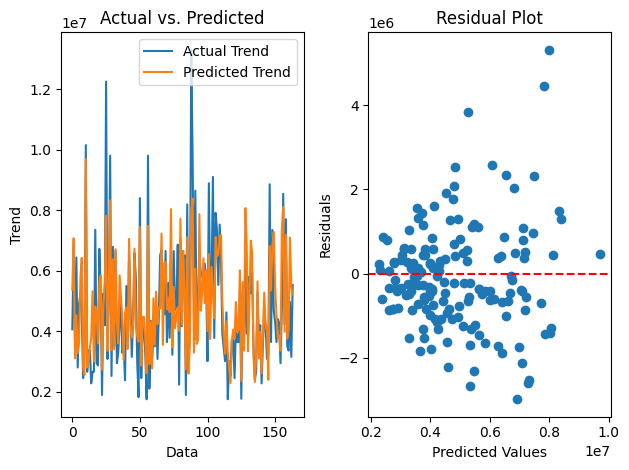

In [26]:
# Plot Actual vs. Predicted values
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual vs. Predicted')

# Plot Residuals
residuals = y_test - y_pred

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()


# Accuracy 🎯💯🚀

In [27]:
r2

0.6463350878895878